In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
red_wine = pd.read_csv("wineQualityReds.csv")
white_wine = pd.read_csv("wineQualityWhites.csv")

In [3]:
red_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Data Preprocessing

In [5]:
def DF_initial_observations(df):
    '''Gives basic details of columns in a dataframe : Data types, distinct values, NAs and sample'''
    if isinstance(df, pd.DataFrame):
        total_na=0
        for i in range(len(df.columns)):        
            total_na+= df.isna().sum()[i]
        print('Dimensions : %d rows, %d columns' % (df.shape[0],df.shape[1]))
        print("Total NA values : %d" % (total_na))
        print('%38s %10s     %10s %10s %15s' % ('Column name', ' Data Type', '# Distinct', ' NA values', ' Sample value'))
        for i in range(len(df.columns)):
            col_name = df.columns[i]
            sampl = df[col_name].sample(1)
            sampl.apply(pd.Categorical)
            sampl_p = str(sampl.iloc[0,])
            print('%38s %10s :   %10d  %10d %15s' % (df.columns[i],df.dtypes[i],df.nunique()[i],df.isna().sum()[i], sampl_p))
    else:
        print('Expected a DataFrame but got a %15s ' % (type(data)))

In [6]:
DF_initial_observations(red_wine)

Dimensions : 1599 rows, 13 columns
Total NA values : 0
                           Column name  Data Type     # Distinct  NA values    Sample value
                            Unnamed: 0      int64 :         1599           0             873
                         fixed.acidity    float64 :           96           0             8.9
                      volatile.acidity    float64 :          143           0            0.62
                           citric.acid    float64 :           80           0            0.67
                        residual.sugar    float64 :           91           0             1.7
                             chlorides    float64 :          153           0 0.09300000000000001
                   free.sulfur.dioxide    float64 :           60           0            19.0
                  total.sulfur.dioxide    float64 :          144           0            43.0
                               density    float64 :          436           0 0.9961200000000001
         

In [7]:
DF_initial_observations(white_wine)

Dimensions : 4898 rows, 13 columns
Total NA values : 0
                           Column name  Data Type     # Distinct  NA values    Sample value
                            Unnamed: 0      int64 :         4898           0            1950
                         fixed.acidity    float64 :           68           0             6.4
                      volatile.acidity    float64 :          125           0            0.23
                           citric.acid    float64 :           87           0             0.4
                        residual.sugar    float64 :          310           0            12.1
                             chlorides    float64 :          160           0 0.027999999999999997
                   free.sulfur.dioxide    float64 :          132           0            35.0
                  total.sulfur.dioxide    float64 :          251           0            90.0
                               density    float64 :          890           0 0.9927299999999999
        

## Combining the two data frames

In [8]:
final_data = pd.concat([red_wine, white_wine], ignore_index=True)

In [9]:
final_data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
final_data.shape

(6497, 13)

### Checking for outliers

In [11]:
final_data.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2043.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,813.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1650.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3274.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4898.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### It is observed that there are outliers in some of the variables.

{'whiskers': [<matplotlib.lines.Line2D at 0x23c227ca908>,
 'caps': [<matplotlib.lines.Line2D at 0x23c227caf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c227ca4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23c227e3668>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c227e3978>],
 'means': []}

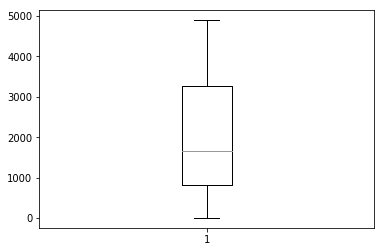

In [12]:
plt.boxplot(final_data['Unnamed: 0'])

#### It can be observed that there are outliers present in the total.sulfur.dioxide for the combined data. Hence removing the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x23c22850d68>,
 'caps': [<matplotlib.lines.Line2D at 0x23c2285d6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c22850c18>],
 'medians': [<matplotlib.lines.Line2D at 0x23c2285dd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c2285de48>],
 'means': []}

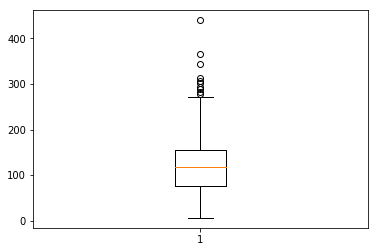

In [13]:
plt.boxplot(final_data['total.sulfur.dioxide'])

##### It can be observed that there are outliers in the final_data with respect to residual.sugar variable. Hence we can remove it.

{'whiskers': [<matplotlib.lines.Line2D at 0x23c228b5550>,
 'caps': [<matplotlib.lines.Line2D at 0x23c228b5be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c228b5160>],
 'medians': [<matplotlib.lines.Line2D at 0x23c228bd2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c228bd5f8>],
 'means': []}

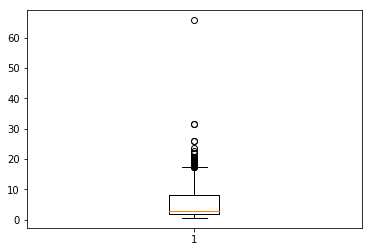

In [14]:
plt.boxplot(final_data['residual.sugar'])

##### It can be observed that there are outliers in the  final_data with respect to free.sulfur.dioxide variable. Hence we can remove it.

{'whiskers': [<matplotlib.lines.Line2D at 0x23c22916588>,
 'caps': [<matplotlib.lines.Line2D at 0x23c22916c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c22916198>],
 'medians': [<matplotlib.lines.Line2D at 0x23c2291e2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c2291e630>],
 'means': []}

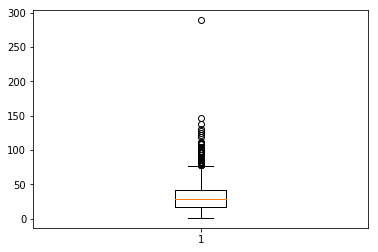

In [15]:
plt.boxplot(final_data['free.sulfur.dioxide'])

##### Removing the outliers from total_data

In [16]:
final_df = final_data[(final_data['total.sulfur.dioxide'] != 440.000000) & (final_data['residual.sugar'] != 65.800000) & (final_data['free.sulfur.dioxide'] != 289.000000)]

In [17]:
final_df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,2043.005851,7.215389,0.339582,0.318600,5.434334,0.056032,30.488992,115.687837,0.994690,3.218440,0.531227,10.491614,5.818784
std,1436.727001,1.296539,0.164476,0.145296,4.699109,0.035038,17.457690,56.384471,0.002948,0.160774,0.148810,1.192801,0.872686
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.500000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.500000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4898.000000,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [19]:
final_df.shape

(6495, 13)

### Constructing a correlation matrix

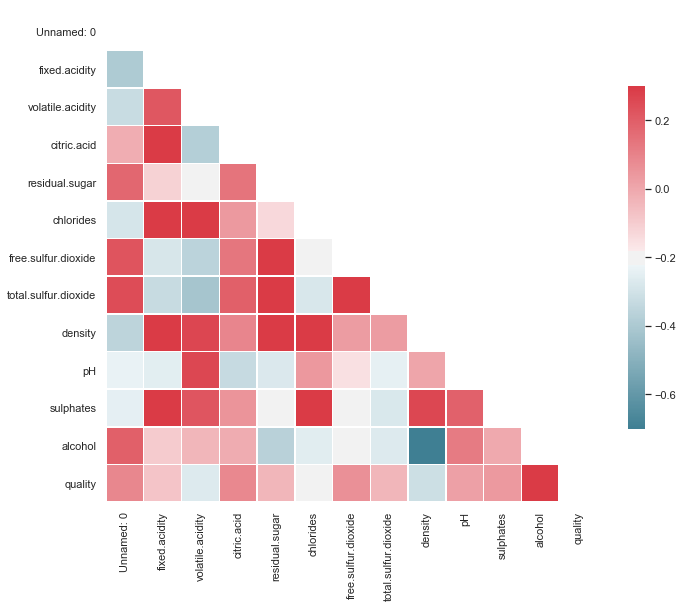

In [20]:
# Correlation matrix - linear relation among independent attributes and with the Target attribute

sns.set(style="white")

# Compute the correlation matrix
correln = final_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correln, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correln, mask=mask, cmap=cmap, vmax=.3, 
            linewidths=.5, cbar_kws={"shrink": .7})


#### Checking the distribution of quality classes

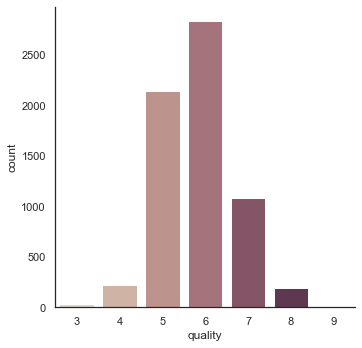

In [19]:
sns.catplot(x="quality", kind="count", palette="ch:.25", data=final_df);

#### Checking the distribution of citric.acid

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

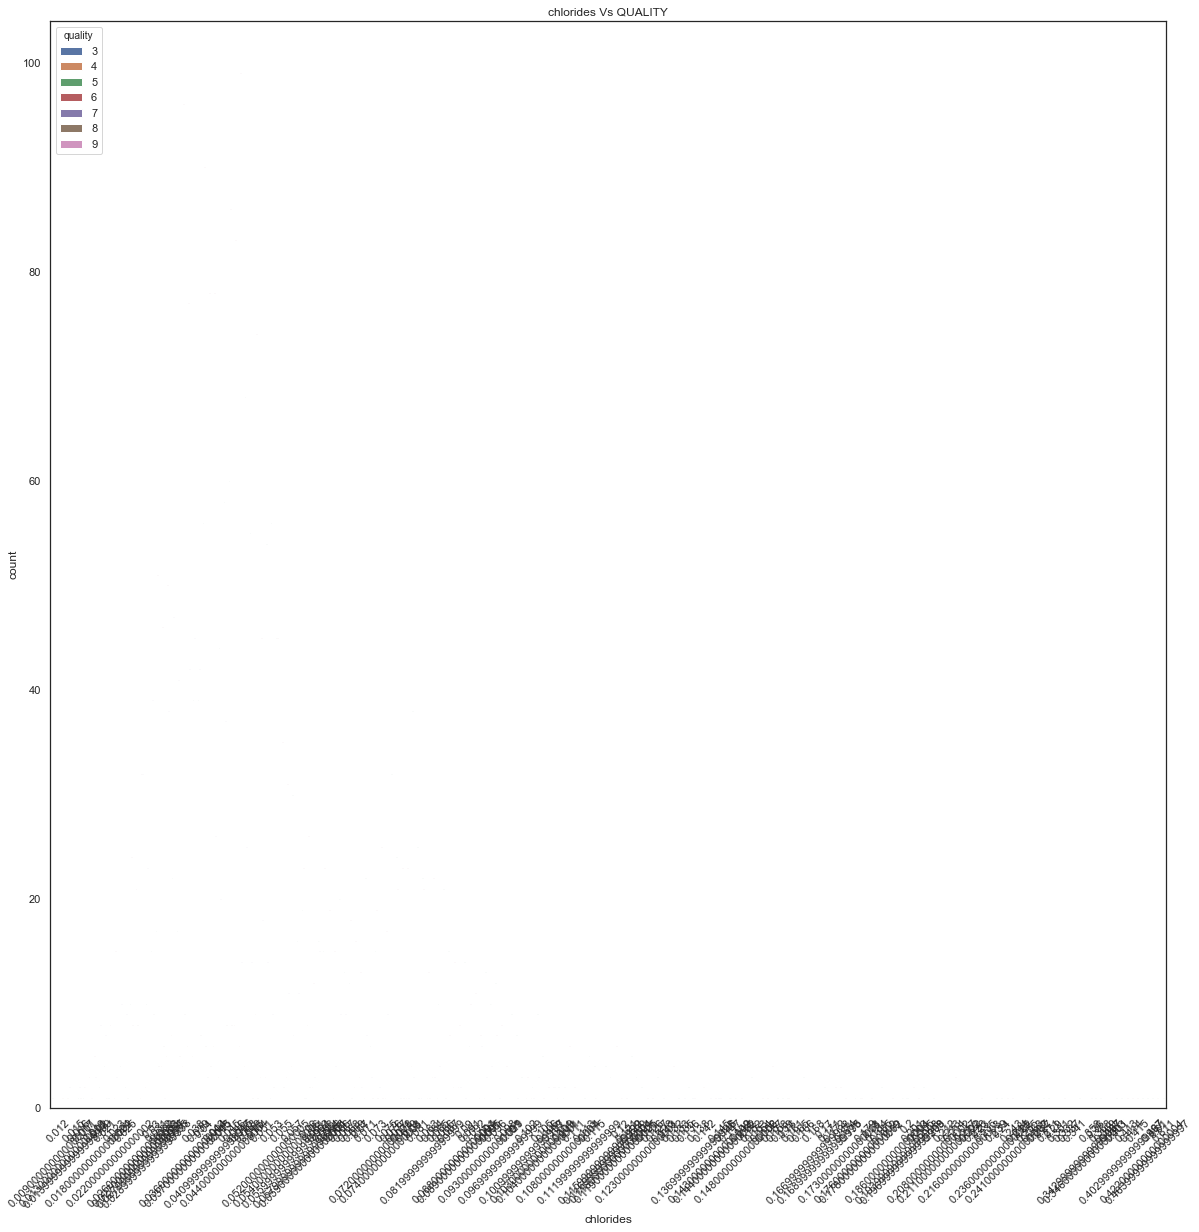

In [25]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='chlorides',data=final_df[['chlorides','quality']],
              hue="quality").set_title("chlorides Vs QUALITY")
plt.xticks(rotation=45)

#### Plotting the Features

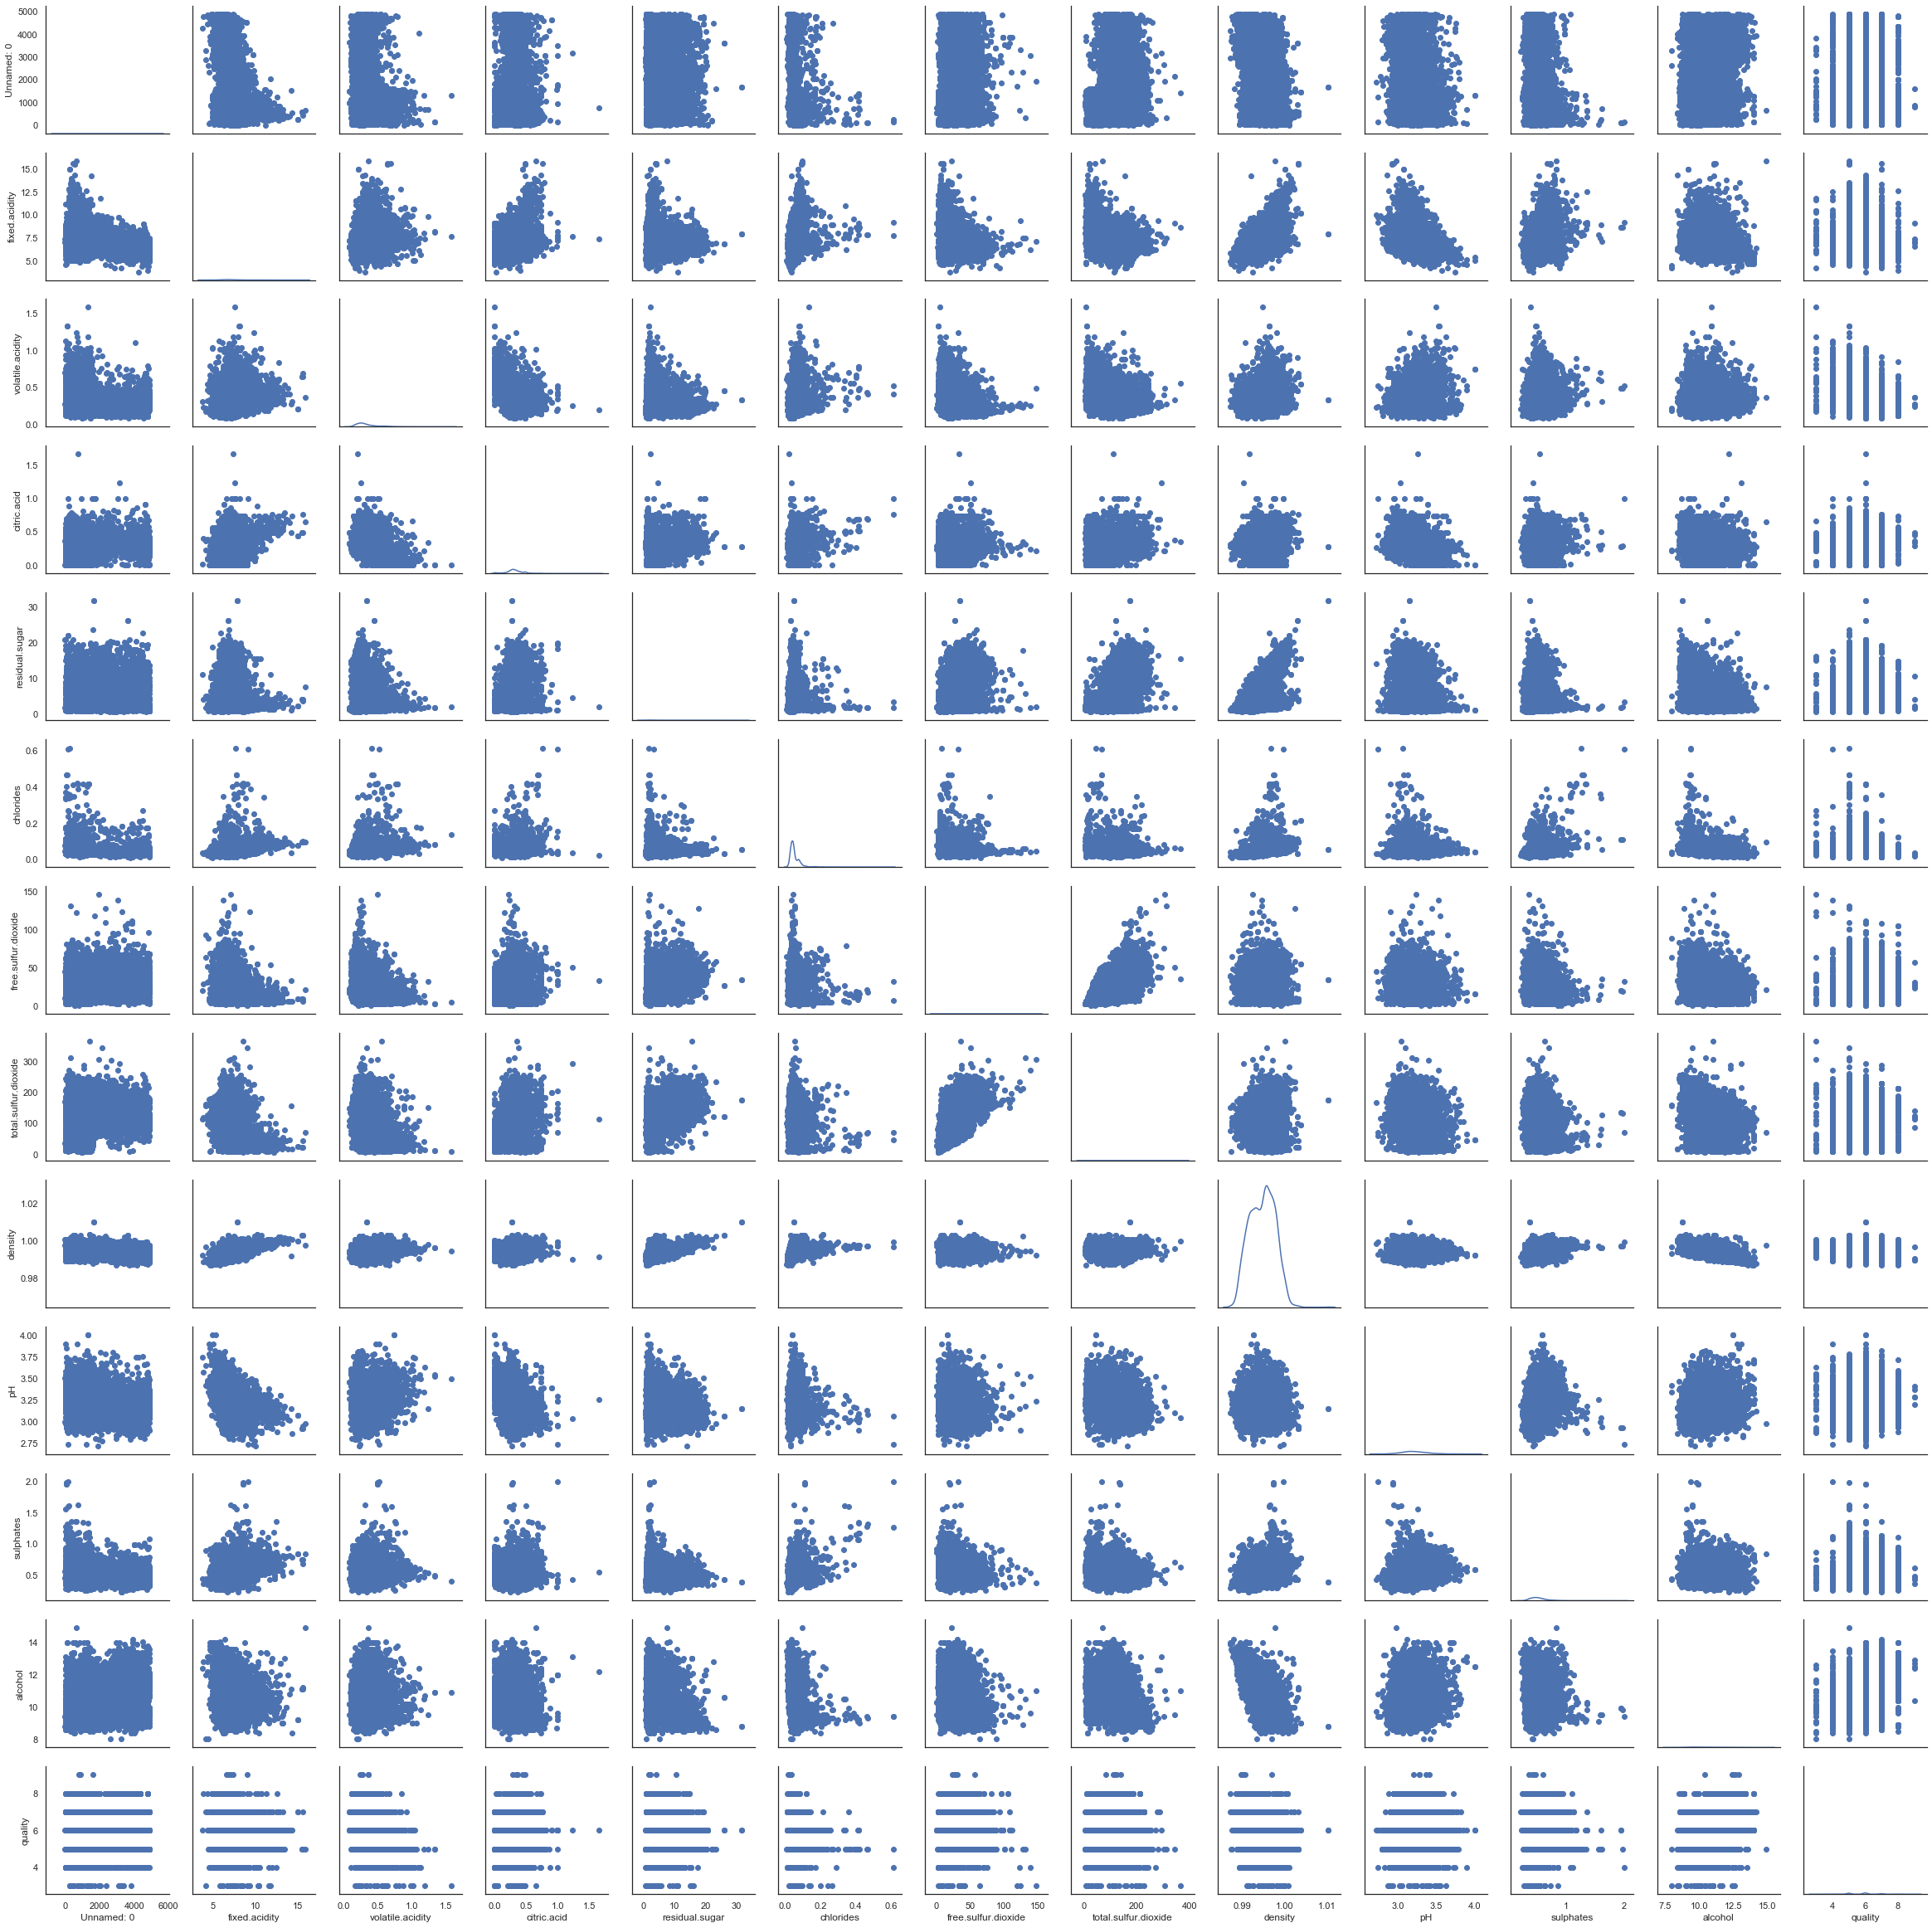

In [20]:
f = sns.PairGrid(final_df)
f.map_diag(sns.kdeplot)
f.map_offdiag(plt.scatter);

## Normalizing the Features & Scaling the Data

In [26]:
y_col = final_df['quality'].values
x_col = final_df.drop(axis=1, labels=['quality'])

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

wine_quality = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()



mm_x_df_col = mm_scaler.fit_transform(x_col)      
std_x_df_col = std_scaler.fit_transform(mm_x_df_col)

X=std_x_df_col
y=y_col

C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
X.shape

(6495, 12)

In [29]:
y.shape

(6495,)

## Splitting the Data into train and test

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print("Size of training set: {}    size of testing set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 4546    size of testing set: 1949



## SVM

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {
    'kernel': ['rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [ 0.1, 0.5, 1]
}

svc = SVC(gamma='scale', random_state=8)
clf = GridSearchCV(svc, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [46]:
svc_best = SVC(C= 1,gamma=1 , random_state=8)
svc_best.fit(X_train, y_train)
y_pred_train = svc_best.predict(X_train)
y_pred_test = svc_best.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
print("Train data")
print("Accuracy score: ", accuracy_score(y_train, y_pred_train))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, y_pred_test))


Train data
Accuracy score:  0.9265288165420149
   
Test data
Accuracy score:  0.6331452026680349


#### Evaluation Metrics

In [51]:
pd.crosstab(y_train, y_pred_train)

col_0,3,4,5,6,7,8
row_0,,,,,,
3,13,0,3,4,0,0
4,0,103,31,16,1,0
5,0,0,1407,87,3,0
6,0,0,53,1919,12,0
7,0,0,8,70,677,0
8,0,0,1,23,18,93
9,0,0,0,3,1,0


In [52]:
pd.crosstab(y_test, y_pred_test)

col_0,4,5,6,7,8
row_0,,,,,
3,0,3,6,0,0
4,5,21,38,1,0
5,0,396,242,3,0
6,0,131,688,32,0
7,0,19,175,129,1
8,0,1,26,15,16
9,0,0,1,0,0


#### Report

In [54]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.08      0.14        65
           5       0.69      0.62      0.65       641
           6       0.59      0.81      0.68       851
           7       0.72      0.40      0.51       324
           8       0.94      0.28      0.43        58
           9       0.00      0.00      0.00         1

   micro avg       0.63      0.63      0.63      1949
   macro avg       0.56      0.31      0.34      1949
weighted avg       0.66      0.63      0.61      1949



C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(DT, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X_train, y_train)

C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [75]:
gs_dt.best_score_

0.5558732952045754

In [76]:
gs_dt.best_params_

{'max_depth': 10}

In [78]:
dt_best = DecisionTreeClassifier(max_depth=10)
dt_best.fit(X_train, y_train)

dt_tr_pred = dt_best.predict(X_train)
dt_test_pred = dt_best.predict(X_test)

In [79]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_train, dt_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))

Train data
Accuracy score:  0.7784865816102068
   
Test data
Accuracy score:  0.5361723961005644


#### Evaluation metrics

In [80]:
pd.crosstab(y_train, dt_tr_pred)

col_0,3,4,5,6,7,8,9
row_0,,,,,,,
3,14,0,2,4,0,0,0
4,2,71,48,29,1,0,0
5,0,4,1168,317,6,2,0
6,1,1,177,1753,48,4,0
7,0,1,28,258,464,4,0
8,0,0,1,40,27,67,0
9,0,0,0,1,1,0,2


In [81]:
pd.crosstab(y_test, dt_test_pred)

col_0,3,4,5,6,7,8
row_0,,,,,,
3,0,0,5,4,0,0
4,0,6,33,22,2,2
5,1,5,384,227,15,9
6,0,13,224,534,67,13
7,0,2,23,182,111,6
8,0,0,4,26,18,10
9,0,0,0,0,1,0


#### Report

In [82]:
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.23      0.09      0.13        65
           5       0.57      0.60      0.58       641
           6       0.54      0.63      0.58       851
           7       0.52      0.34      0.41       324
           8       0.25      0.17      0.20        58
           9       0.00      0.00      0.00         1

   micro avg       0.54      0.54      0.54      1949
   macro avg       0.30      0.26      0.27      1949
weighted avg       0.52      0.54      0.52      1949



C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

estimator = [20,50,70]
max_features_val= [2,5,8,12]


param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)

rf_c = RandomForestClassifier()

rfgs_c = GridSearchCV(rf_c, param_grid = param_grid, cv=10, scoring='r2')
rfgs_c.fit(X_train,y_train)

{'n_estimators': [20, 50, 70], 'max_features': [2, 5, 8, 12]}


C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [2, 5, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [86]:
rfgs_c.best_score_

0.39523867583843025

In [88]:
rfgs_c.best_params_

{'max_features': 12, 'n_estimators': 50}

In [89]:
rf_c_best = RandomForestClassifier(n_estimators= 50,max_features= 12 )

In [90]:
rf_c_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
rf_tr_pred = rf_c_best.predict(X_train)
rf_test_pred = rf_c_best.predict(X_test)

In [92]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_train, rf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, rf_test_pred))

Train data
Accuracy score:  1.0
   
Test data
Accuracy score:  0.6634171369933299


#### Evaluation Metrics

In [93]:
pd.crosstab(y_train, rf_tr_pred)

col_0,3,4,5,6,7,8,9
row_0,,,,,,,
3,20,0,0,0,0,0,0
4,0,151,0,0,0,0,0
5,0,0,1497,0,0,0,0
6,0,0,0,1984,0,0,0
7,0,0,0,0,755,0,0
8,0,0,0,0,0,135,0
9,0,0,0,0,0,0,4


In [94]:
pd.crosstab(y_test, rf_test_pred)

col_0,4,5,6,7,8
row_0,,,,,
3,1,5,3,0,0
4,10,34,21,0,0
5,4,459,175,3,0
6,2,165,634,48,2
7,0,10,147,166,1
8,0,1,15,18,24
9,0,0,0,1,0


#### Report

In [95]:
report = classification_report(y_test, rf_test_pred)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.59      0.15      0.24        65
           5       0.68      0.72      0.70       641
           6       0.64      0.75      0.69       851
           7       0.70      0.51      0.59       324
           8       0.89      0.41      0.56        58
           9       0.00      0.00      0.00         1

   micro avg       0.66      0.66      0.66      1949
   macro avg       0.50      0.36      0.40      1949
weighted avg       0.67      0.66      0.65      1949



C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Feature Importance

In [96]:
features_imp = rf_c_best.feature_importances_

In [99]:
cols = x_col.columns

In [100]:
feat_cols = pd.DataFrame({'name_col':cols,'feat_imp':features_imp})

In [101]:
feat_cols
feat_cols.sort_values(by='feat_imp',ascending=False)

,name_col,feat_imp
11,alcohol,0.144310
2,volatile.acidity,0.102837
0,Unnamed: 0,0.096892
10,sulphates,0.082277
6,free.sulfur.dioxide,0.077818
9,pH,0.077603
7,total.sulfur.dioxide,0.076275
5,chlorides,0.071189
4,residual.sugar,0.069922
1,fixed.acidity,0.068418


Text(0.5, 0, 'Relative Importance')

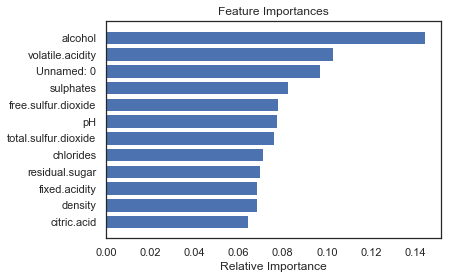

In [102]:
features=cols
importances = rf_c_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
